In [183]:
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


### 1. Load Customer CSV

In [184]:
customers = pd.read_csv("assets/task_DE_new_customers.csv")   # customer_id, customer_name, mobile_number, region
customers['mobile_number'] = customers['mobile_number'].astype(str).str.replace(r"\D", "", regex=True)


In [185]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    5 non-null      object
 1   customer_name  5 non-null      object
 2   mobile_number  5 non-null      object
 3   region         5 non-null      object
dtypes: object(4)
memory usage: 292.0+ bytes


In [186]:
customers.describe()

,customer_id,customer_name,mobile_number,region
count,5,5,5,5
unique,5,5,5,4
top,CUST-001,Aarav Mehta,9123456781,West
freq,1,1,1,2


In [187]:
customers.isnull().sum()

customer_id      0
customer_name    0
mobile_number    0
region           0
dtype: int64

In [188]:
customers.head()

,customer_id,customer_name,mobile_number,region
0,CUST-001,Aarav Mehta,9123456781,West
1,CUST-002,Neha Sharma,9123456782,North
2,CUST-003,Rohan Gupta,9123456783,South
3,CUST-004,Priya Iyer,9123456784,West
4,CUST-005,Kabir Singh,9123456785,Central


### 2. Load Orders XML


In [189]:
tree = ET.parse("assets/task_DE_new_orders.xml")
root = tree.getroot()

orders_list = []
for order in root.findall("order"):
    orders_list.append({
        "order_id": order.find("order_id").text,
        "mobile_number": order.find("mobile_number").text,
        "order_date_time": order.find("order_date_time").text,
        "sku_id": order.find("sku_id").text,
        "sku_count": int(order.find("sku_count").text),
        "total_amount": float(order.find("total_amount").text)
    })

orders = pd.DataFrame(orders_list)
orders["mobile_number"] = orders["mobile_number"].astype(str).str.replace(r"\D", "", regex=True)
orders["order_date_time"] = pd.to_datetime(orders["order_date_time"])

# Merge both datasets
df = orders.merge(customers, on="mobile_number", how="left")

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         10 non-null     object        
 1   mobile_number    10 non-null     object        
 2   order_date_time  10 non-null     datetime64[ns]
 3   sku_id           10 non-null     object        
 4   sku_count        10 non-null     int64         
 5   total_amount     10 non-null     float64       
 6   customer_id      10 non-null     object        
 7   customer_name    10 non-null     object        
 8   region           10 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 852.0+ bytes


In [191]:
df.describe()

,order_date_time,sku_count,total_amount
count,10,10.000000,10.000000
mean,2025-10-13 19:23:40.600000,1.800000,7396.700000
min,2025-09-30 18:45:55,1.000000,5299.000000
25%,2025-09-30 18:45:55,1.000000,5836.750000
50%,2025-10-12 09:15:32,1.500000,7450.000000
75%,2025-10-27 13:05:30.500000,2.000000,8930.000000
max,2025-11-01 14:22:10,4.000000,8930.000000
std,NaN,1.032796,1585.125095


In [192]:
df.isnull().sum()

order_id           0
mobile_number      0
order_date_time    0
sku_id             0
sku_count          0
total_amount       0
customer_id        0
customer_name      0
region             0
dtype: int64

In [193]:
df.head()

,order_id,mobile_number,order_date_time,sku_id,sku_count,total_amount,customer_id,customer_name,region
0,ORD-2025-0001,9123456781,2025-10-12 09:15:32,SKU-1001,2,7450.0,CUST-001,Aarav Mehta,West
1,ORD-2025-0001,9123456781,2025-10-12 09:15:32,SKU-1004,1,7450.0,CUST-001,Aarav Mehta,West
2,ORD-2025-0001,9123456781,2025-10-12 09:15:32,SKU-1010,3,7450.0,CUST-001,Aarav Mehta,West
3,ORD-2025-0002,9123456781,2025-11-01 14:22:10,SKU-1002,1,5299.0,CUST-001,Aarav Mehta,West
4,ORD-2025-0002,9123456781,2025-11-01 14:22:10,SKU-1007,2,5299.0,CUST-001,Aarav Mehta,West


###  1: Repeat Customers (more than one order)


In [194]:
repeat_customers = (
    df.groupby("customer_name")["order_id"]
    .count()
    .reset_index()
)
repeat_customers = repeat_customers[repeat_customers["order_id"] > 1]
print("Repeat Customers:\n", repeat_customers, "\n")


Repeat Customers:
   customer_name  order_id
0   Aarav Mehta         6
1   Neha Sharma         4 



C:\Users\prana\AppData\Local\Temp\ipykernel_35760\249883545.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['customer_id'], palette="Set2")


([<matplotlib.axis.YTick at 0x22130abc410>,
 [Text(0, 0, 'Aarav Mehta'), Text(0, 1, 'Neha Sharma')])

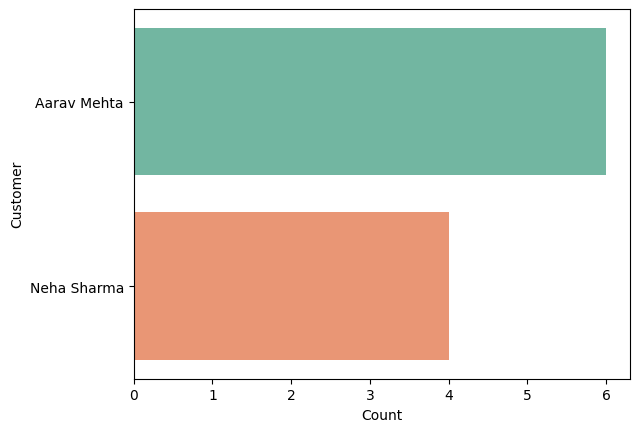

In [195]:

sns.countplot(df['customer_id'], palette="Set2")
plt.xlabel('Count')
plt.ylabel('Customer')
plt.yticks([0,1], ['Aarav Mehta', 'Neha Sharma'])

### 2: Monthly Order Trends

In [196]:
df["month"] = df["order_date_time"].dt.to_period("M")
monthly_trends = df.groupby("month")["order_id"].count().reset_index()
print("Monthly Order Trends:\n", monthly_trends, "\n")

Monthly Order Trends:
      month  order_id
0  2025-09         4
1  2025-10         3
2  2025-11         3 



C:\Users\prana\AppData\Local\Temp\ipykernel_35760\2158832938.py:2: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(monthly_trends["month"]):


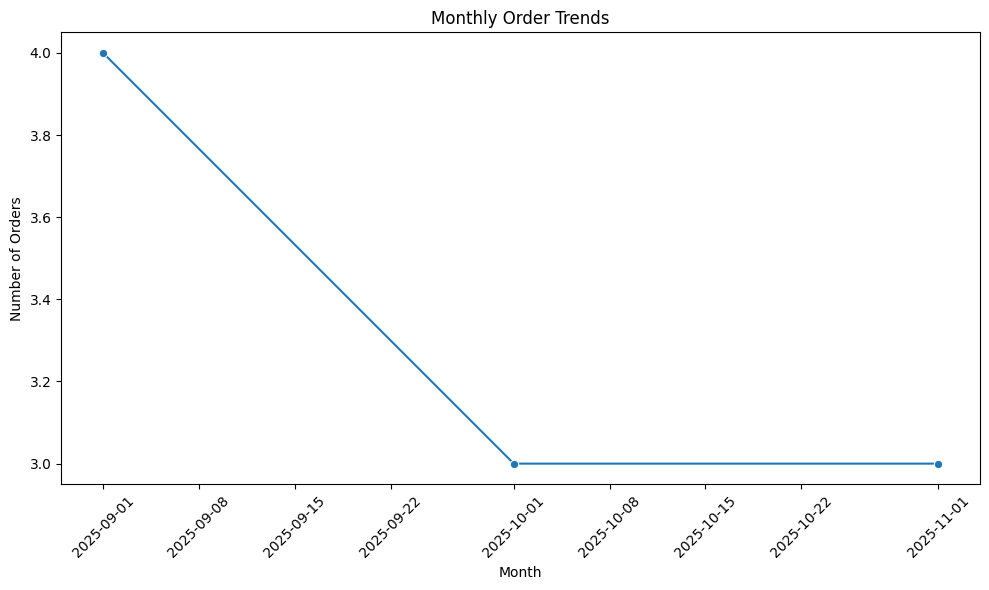

In [ ]:
if pd.api.types.is_period_dtype(monthly_trends["month"]):
	monthly_trends = monthly_trends.copy()
	monthly_trends["month"] = monthly_trends["month"].dt.to_timestamp()

plt.figure(figsize=(10, 6))
sns.lineplot(x="month", y="order_id", data=monthly_trends, marker='o')

plt.title('Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3: Regional Revenue

In [198]:
regional_revenue = df.groupby("region")["total_amount"].sum().reset_index()
print("Regional Revenue:\n", regional_revenue, "\n")


Regional Revenue:
   region  total_amount
0  North       35720.0
1   West       38247.0 



C:\Users\prana\AppData\Local\Temp\ipykernel_35760\1221075233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="total_amount", data=regional_revenue, palette="Set2")


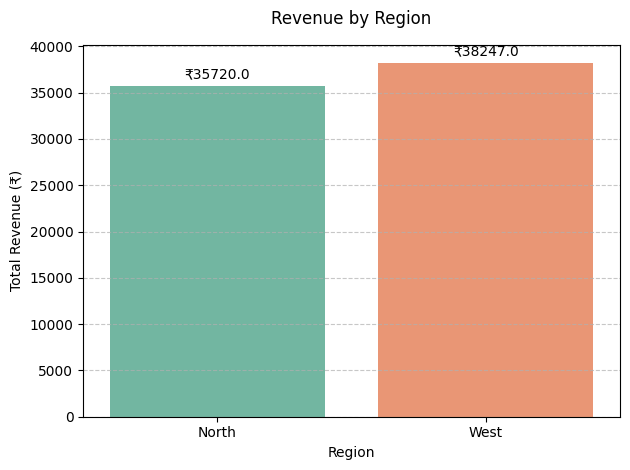

In [199]:
plt.figure()
sns.barplot(x="region", y="total_amount", data=regional_revenue, palette="Set2")

plt.title('Revenue by Region', fontsize=12, pad=15)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Total Revenue (₹)', fontsize=10)

# Add value labels on top of each bar
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='₹%.1f', padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4: Top Customers by Spend (Last 30 Days)

In [200]:

today = df["order_date_time"].max()
cutoff = today - timedelta(days=30)

last_30 = df[df["order_date_time"] >= cutoff]
top_customers = (
    last_30.groupby("customer_name")["total_amount"]
    .sum()
    .reset_index()
    .sort_values(by="total_amount", ascending=False)
)
print("Top Customers in Last 30 Days:\n", top_customers, "\n")


Top Customers in Last 30 Days:
   customer_name  total_amount
0   Aarav Mehta       38247.0 

